In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions
from pyspark.sql.types import FloatType
from cassandra.cluster import Cluster
import matplotlib.pyplot as plt

In [2]:
# CONEXAO COM CASSANDRA
clstr = Cluster(['34.95.248.131'], port=9042)
session = clstr.connect('analise_combustivel')

In [3]:
dados = session.execute("select * from consumo;")
df_consumo = pd.DataFrame(dados)
print("Total de valores no banco de dados: ", len(df_consumo))

Total de valores no banco de dados:  5558536


In [4]:
df_consumo['ano'] = pd.to_datetime(df_consumo['data_da_coleta'], format='%d/%m/%Y')
df_consumo['ano'] = df_consumo['ano'].dt.year

In [5]:
df = df_consumo.loc[df_consumo["ano"] == 2020]
df.drop(columns=['valor_de_venda', 'ano'], inplace = True)
df.dropna(inplace = True)
df_norte = df.loc[df["regiao_sigla"] == "N"]
df_sul = df.loc[df["regiao_sigla"] == "S"]
df_nordeste = df.loc[df["regiao_sigla"] == "NE"]
df_sudeste = df.loc[df["regiao_sigla"] == "SE"]
df_centrooeste = df.loc[df["regiao_sigla"] == "CO"]

/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_2353/4244529501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [6]:
df_norte = df_norte.groupby('bandeira').mean()
df_norte.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_norte.head(3)

,valor_de_compra
bandeira,
RAIZEN,3.686671
EQUADOR,3.623103
IPIRANGA,3.503663


In [7]:
df_norte.tail(3)

,valor_de_compra
bandeira,
SIMARELLI,3.331332
BRANCA,3.329735
SP,3.067085


In [8]:
df_sul = df_sul.groupby('bandeira').mean()
df_sul.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_sul.head(3)

,valor_de_compra
bandeira,
RAIZEN MIME,3.657833
ALESAT,3.578690
MAXSUL,3.422445


In [9]:
df_sul.tail(3)

,valor_de_compra
bandeira,
REJAILE,2.911671
UNI,2.667103
DIBRAPE,2.663043


In [10]:
df_nordeste = df_nordeste.groupby('bandeira').mean()
df_nordeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_nordeste.head(3)

,valor_de_compra
bandeira,
SP,3.616973
SABBÁ,3.571606
FAN,3.547091


In [11]:
df_nordeste.tail(3)

,valor_de_compra
bandeira,
BRANCA,3.202791
PETROBAHIA,3.162521
LARCO,3.134409


In [12]:
df_sudeste = df_sudeste.groupby('bandeira').mean()
df_sudeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_sudeste.head(3)

,valor_de_compra
bandeira,
PETROBAHIA,3.773067
TOBRAS,3.585627
ATLÂNTICA,3.575480


In [13]:
df_sudeste.tail(3)

,valor_de_compra
bandeira,
MONTEPETRO,3.045958
BRANCA,3.036119
D`MAIS,2.413156


In [14]:
df_centrooeste = df_centrooeste.groupby('bandeira').mean()
df_centrooeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_centrooeste.head(3)

,valor_de_compra
bandeira,
ALESAT,3.585967
ROYAL FIC,3.535529
SIMARELLI,3.505197


In [15]:
df_centrooeste.tail(3)

,valor_de_compra
bandeira,
RAIZEN,3.298589
BRANCA,3.178967
TOTAL BRASIL,3.083771


Utilizando os dados válidos podemos observar que o maior custo dos postos é a compra do combustivel, é interessante realizar uma análise sobre quais os valores de compra das diferentes bandeiras existentes, para isso fizemos o calculo da média de cada bandeira por cada região do país. Com isso, é possível saber quanto cada bandeira cobra por litro de combustivel, podendo o posto trocar de bandeira, respeitando os termos do contrato, ou alterar para a bandeira branca (sem bandeira) e comprar o combustível de onde desejar.

In [36]:
df_aux = df_consumo.dropna()
gasolina = df_aux.loc[df_aux["produto"] == 'GASOLINA']
etanol = df_aux.loc[df_aux["produto"] == 'ETANOL']
diesel = df_aux.loc[df_aux["produto"] == 'DIESEL']
s10 = df_aux.loc[df_aux["produto"] == 'DIESEL S10'] 
gnv = df_aux.loc[df_aux["produto"] == 'GNV'] 

dataframe_gasolina = gasolina.groupby("ano").mean()
dataframe_gasolina.reset_index(inplace = True)
dataframe_etanol = etanol.groupby("ano").mean()
dataframe_etanol.reset_index(inplace = True)
dataframe_diesel = diesel.groupby("ano").mean()
dataframe_diesel.reset_index(inplace = True)
dataframe_diesels10 = s10.groupby("ano").mean()
dataframe_diesels10.reset_index(inplace = True)
dataframe_gnv = gnv.groupby("ano").mean()
dataframe_gnv.reset_index(inplace = True)

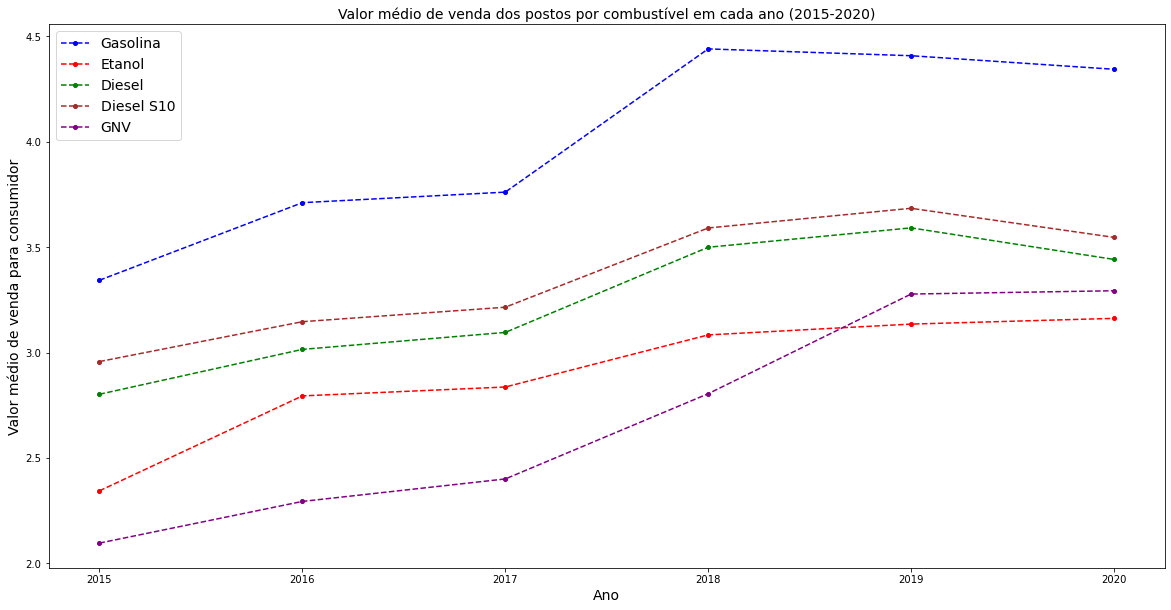

In [37]:
plt.figure(figsize=(20,10))
plt.plot(dataframe_gasolina["ano"], dataframe_gasolina["valor_de_venda"], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(dataframe_etanol["ano"], dataframe_etanol["valor_de_venda"], linestyle='--', marker='o', color = 'red', markersize = 4)
plt.plot(dataframe_diesel["ano"], dataframe_diesel["valor_de_venda"], linestyle='--', marker='o', color = 'green', markersize = 4)
plt.plot(dataframe_diesels10["ano"], dataframe_diesels10["valor_de_venda"], linestyle='--', marker='o', color = 'brown', markersize = 4)
plt.plot(dataframe_gnv["ano"], dataframe_gnv["valor_de_venda"], linestyle='--', marker='o', color = 'purple', markersize = 4)
plt.title("Valor médio de venda dos postos por combustível em cada ano (2015-2020)", fontsize=14)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor médio de venda para consumidor", fontsize=14)
plt.legend(['Gasolina','Etanol','Diesel','Diesel S10',"GNV"], fontsize=14)
plt.show()

Gráfico com a média histórica anual do valor de venda dos combustíveis para os consumidores.

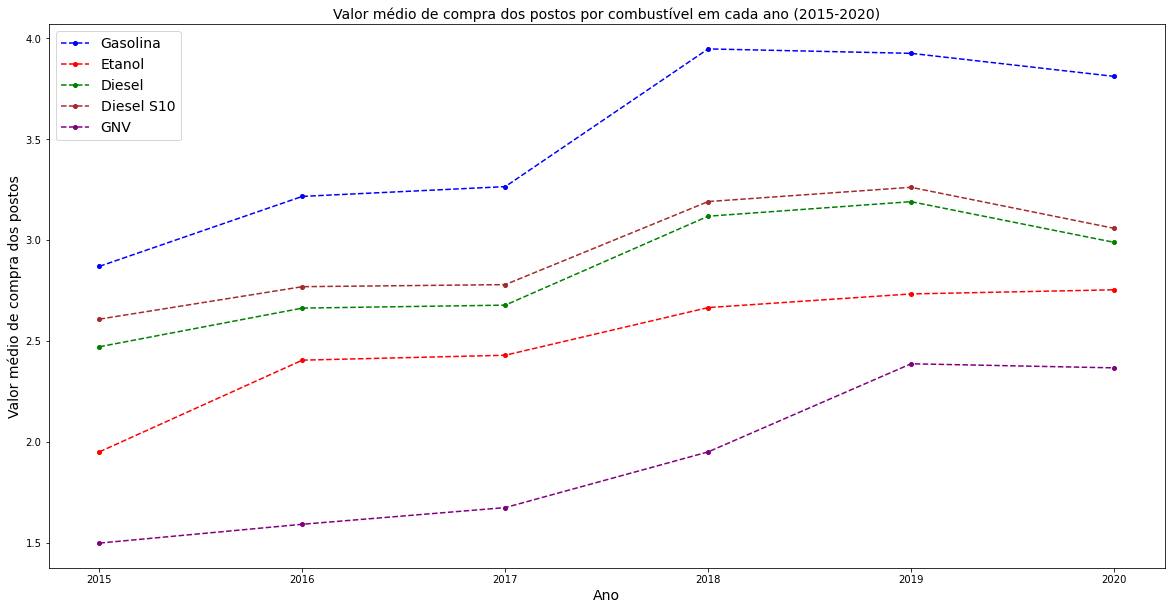

In [38]:
plt.figure(figsize=(20,10))
plt.plot(dataframe_gasolina["ano"], dataframe_gasolina["valor_de_compra"], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(dataframe_etanol["ano"], dataframe_etanol["valor_de_compra"], linestyle='--', marker='o', color = 'red', markersize = 4)
plt.plot(dataframe_diesel["ano"], dataframe_diesel["valor_de_compra"], linestyle='--', marker='o', color = 'green', markersize = 4)
plt.plot(dataframe_diesels10["ano"], dataframe_diesels10["valor_de_compra"], linestyle='--', marker='o', color = 'brown', markersize = 4)
plt.plot(dataframe_gnv["ano"], dataframe_gnv["valor_de_compra"], linestyle='--', marker='o', color = 'purple', markersize = 4)
plt.title("Valor médio de compra dos postos por combustível em cada ano (2015-2020)", fontsize=14)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor médio de compra dos postos", fontsize=14)
plt.legend(['Gasolina','Etanol','Diesel','Diesel S10',"GNV"], fontsize=14)
plt.show()

Gráfico com a média histórica anual do valor de venda dos combustíveis para os consumidores.

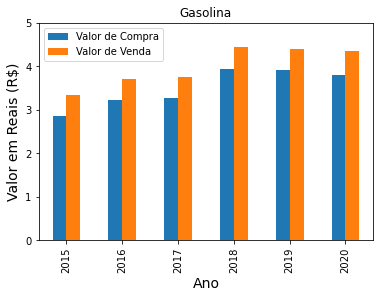

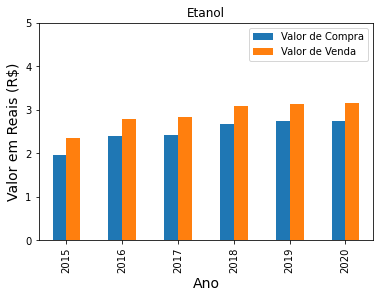

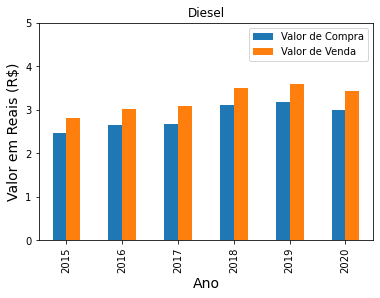

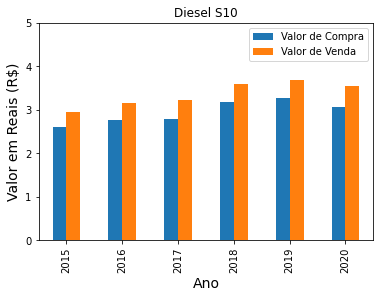

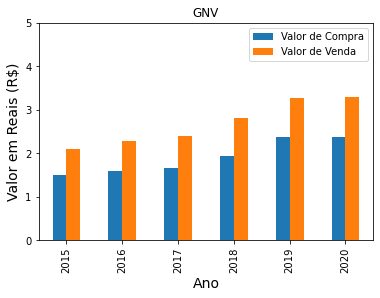

In [39]:
dataframe_gasolina.plot(x='ano', kind='bar', title='Gasolina')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_etanol.plot(x='ano', kind='bar', title='Etanol')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_diesel.plot(x='ano', kind='bar', title='Diesel')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_diesels10.plot(x='ano', kind='bar', title='Diesel S10')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_gnv.plot(x='ano', kind='bar', title='GNV')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])

Gráficos comparando o valor de compra e o valor de venda de cada combustível por ano.

In [26]:
df_validos = df_consumo.dropna()
df_validos.count()

id                 2130965
bandeira           2130965
cnpj               2130965
data_da_coleta     2130965
estado_sigla       2130965
municipio          2130965
produto            2130965
razao_social       2130965
regiao_sigla       2130965
valor_de_compra    2130965
valor_de_venda     2130965
ano                2130965
dtype: int64

In [27]:
df_faltantes = df_consumo.loc[df_consumo["valor_de_compra"].isnull()]
df_faltantes.count()

id                 3427571
bandeira           3427571
cnpj               3427571
data_da_coleta     3427571
estado_sigla       3427571
municipio          3427571
produto            3427571
razao_social       3427571
regiao_sigla       3427571
valor_de_compra          0
valor_de_venda     3427571
ano                3427571
dtype: int64

Na nossa base de dados temos em torno de 5 milhões de dados, e identificamos que existem dados inválidos na coluna valor de compra, onde esses dados não estão informados, sendo em torno de 3 milhões de dados. Sugerimos tornar obrigatória a inclusão desse campo na base de dados e com isso permitir que os postos possam utilizar essas informações, que são públicas para tomarem decisões. 
